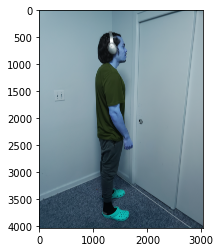

In [8]:
import cv2
import matplotlib.pyplot as plt
# read the image in 
photo=cv2.imread("images/mStanding1.jpg")
#lET US SEE THE SHAPE OF THE IMAGE.
#print(photo.shape)|
plt.imshow(photo)

In [9]:
import pandas as pd
import time
import numpy as np    # for mathematical operations
import cv2
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline

from keras.preprocessing import image   # for preprocessing the images

from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

# Specify the paths for the 2 files
protoFile = "openpose-master/models/pose/mpi/pose_deploy_linevec.prototxt"
weightsFile = "openpose-master/models/pose/mpi/pose_iter_160000.caffemodel"
nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]



# Read the network into Memory
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
usrimg = r"images/mStanding1.jpg"
print(usrimg)

images/mStanding1.jpg


In [10]:
# Read image
frame = cv2.imread("images/mStanding1.jpg")

# Specify the input image dimensions
inWidth = 3024
inHeight = 4032
threshold = 0.1
 
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]

t = time.time()

# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)
 
# Set the prepared object as the input blob of the network
net.setInput(inpBlob)

In [11]:
#prediction
output = net.forward()
output

array([[[[-1.90099236e-05, -4.30659857e-05, -4.78241127e-05, ...,
          -7.84166041e-05, -8.83721514e-05, -7.55718793e-05],
         [-2.45253905e-05, -2.86822906e-05, -2.77417712e-05, ...,
          -8.79621948e-05, -1.06400694e-04, -8.30028512e-05],
         [-2.79699452e-05, -4.34610993e-05, -5.04096970e-05, ...,
          -1.02394202e-04, -1.27295847e-04, -9.70404362e-05],
         ...,
         [-3.79298581e-05, -4.57406277e-05, -5.44142677e-05, ...,
          -9.10609378e-05, -7.94712687e-05, -7.37317023e-05],
         [-4.14301758e-05, -4.00710851e-05, -5.18418383e-05, ...,
          -7.35179638e-05, -6.95019262e-05, -7.94426305e-05],
         [-3.19528081e-05, -7.03635742e-05, -7.59360701e-05, ...,
          -9.26888097e-05, -1.02952123e-04, -9.90416738e-05]],

        [[-1.05754654e-04, -1.31164008e-04, -1.34497037e-04, ...,
          -1.57188042e-04, -1.55719434e-04, -1.41756725e-04],
         [-1.21119105e-04, -1.15140872e-04, -1.17240976e-04, ...,
          -1.66756829e

In [12]:
H = output.shape[2]
W = output.shape[3]
# Empty list to store the detected keypoints
points = []
for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    
    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
 
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H
 
    if prob > threshold :
        cv2.circle(frame, (int(x), int(y)), 15, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
 
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)
points

[(424, 1576),
 (400, 1600),
 (1352, 424),
 (1352, 432),
 None,
 (1600, 792),
 None,
 None,
 (1456, 3656),
 None,
 None,
 (1448, 3648),
 (1664, 2560),
 None,
 (1384, 432)]

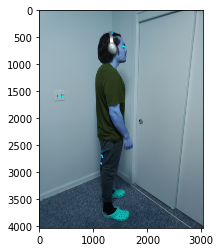

In [52]:
plt.imshow(frame)

In [13]:
for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]

        if points[partA] and points[partB]:
            cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3, lineType=cv2.LINE_AA)
            cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)



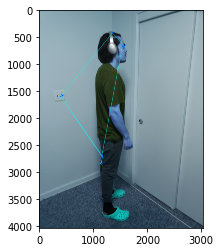

In [54]:
#cv2.putText(frame, "time taken = {:.2f} sec".format(time.time() - t), (50, 50), cv2.FONT_HERSHEY_COMPLEX, .8, (255, 50, 0), 2, lineType=cv2.LINE_AA)
# cv2.putText(frame, "OpenPose using OpenCV", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 50, 0), 2, lineType=cv2.LINE_AA)
plt.imshow(frame)
#
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
#cv2.imshow('Output-Keypoints', frame)